# Sense Function

In this notebook, let's go over the steps a robot takes to help localize itself from an initial, uniform distribution to sensing and updating that distribution.

You know these steps well, and this time, you're tasked with writing a function `sense` that encompasses this behavior. 

1. The robot starts off knowing nothing; the robot is equally likely to be anywhere and so `p` is a uniform distribution.
2. Then the robot senses a grid color: red or green, and updates this distribution `p` according to the values of pHit and pMiss.

* The probability that it is sensing the color correctly is `pHit = 0.6`.
* The probability that it is sensing the wrong color is `pMiss = 0.2`

<img src='images/robot_sensing.png' width=50% height=50% />


In [5]:
# importing resources
import matplotlib.pyplot as plt
import numpy as np

A helper function for visualizing a distribution.

In [3]:
def display_map(grid, bar_width=1):
    if(len(grid) > 0):
        x_labels = range(len(grid))
        plt.bar(x_labels, height=grid, width=bar_width, color='b')
        plt.xlabel('Grid Cell')
        plt.ylabel('Probability')
        plt.ylim(0, 1) # range of 0-1 for probability values 
        plt.title('Probability of the robot being at each cell in the grid')
        plt.xticks(np.arange(min(x_labels), max(x_labels)+1, 1))
        plt.show()
    else:
        print('Grid is empty')


### QUIZ: Complete the sense function so that this outputs an normalized distribution, `p`, after sensing. 

Use the previous exercise as a starting point. `q = [0.04, 0.12, 0.12, 0.04, 0.04]` should be exactly the distribution you get when the sensor measurement `Z= 'red'`. 

This complete function should also output the correct `q` for `Z= 'green'`.

Note that `pHit` refers to the probability that the robot correctly senses the color of the square it is on, so if a robot senses red *and* is on a red square, we'll multiply the current location probability (0.2) with pHit. Same goes for if a robot senses green *and* is on a green square.

In [6]:
## Complete this function
def sense(p, Z):
    ''' Takes in a current probability distribution, p, and a sensor reading, Z.
        Returns an normalized distribution after the sensor measurement has been made, q.
        This should be accurate whether Z is 'red' or 'green'. '''
    
    q=[]
    
    for i in range(len(p)):
        if world[i] == Z:
            q.append(p[i] * pHit)
        else:
            q.append(p[i] * pMiss)
            
    q_normalized = [x/sum(q) for x in q]
    
    return q_normalized

[0.2727272727272727, 0.09090909090909093, 0.09090909090909093, 0.2727272727272727, 0.2727272727272727]


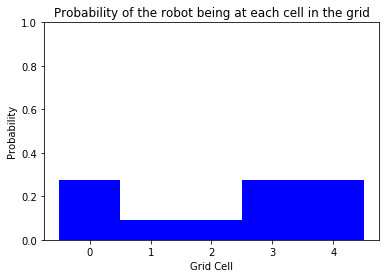

In [7]:
# given initial variables
p=[0.2, 0.2, 0.2, 0.2, 0.2]
# the color of each grid cell in the 1D world
world=['green', 'red', 'red', 'green', 'green']
# Z, the sensor reading ('red' or 'green')
Z = 'green'
pHit = 0.6
pMiss = 0.2

q = sense(p,Z)
print(q)
display_map(q)

### Measure Twice

Below is the normalized sense function, add code that can loop over muliple measurements, now in a *list* `measurements`. Add to this code so that it updates the probability twice and gives the posterior distribution after both measurements are incorporated. 

Make sure that your code allows for any sequence of measurements whether two measurements or more have been taken.

[0.20000000000000004, 0.19999999999999996, 0.19999999999999996, 0.20000000000000004, 0.20000000000000004]


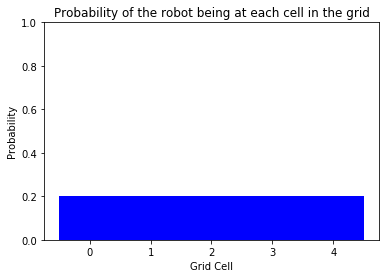

In [8]:
# measurements, now a *list* of sensor readings ('red' or 'green')
measurements = ['red', 'green']

for measure in measurements:
    p = sense(p, measure)

print(p)
display_map(p)

# Move Function

Now that you know how a robot uses sensor measurements to update its idea of its own location, let's see how we can incorporate motion into this location. In this notebook, let's go over the steps a robot takes to help localize itself from an initial, uniform distribution to sensing, moving and updating that distribution.

We include the `sense` function that you've seen, which updates an initial distribution based on whether a robot senses a grid color: red or green. 

Next, you're tasked with writing a function `move` that incorporates motion into the distribution. As seen below, **one motion `U= 1` to the right, causes all values in a distribution to shift one grid cell to the right.**

<img src='images/motion_1.png' width=50% height=50% />

In [62]:
def move(p, U):
    q = []
    for i in range(len(p)):
        q.append(p[i-U])

    return q

[0, 1, 0, 0, 0]


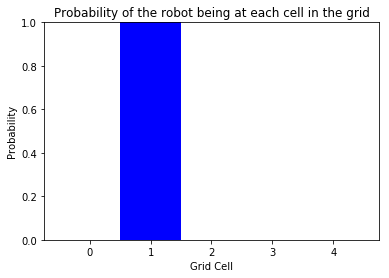

[0, 0, 1, 0, 0]


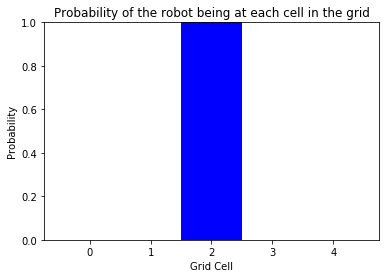

In [63]:
p=[0, 1, 0, 0, 0]
print(p)
display_map(p)

p_shift = move(p, 1)
print(p_shift)
display_map(p_shift)

# Inexact Move Function

Let's see how we can incorporate **uncertain** motion into our motion update. We include the `sense` function that you've seen, which updates an initial distribution based on whether a robot senses a grid color: red or green. 

Next, you're tasked with modifying the `move` function so that it incorporates uncertainty in motion.

<img src='images/uncertain_motion.png' width=50% height=50% />



In [69]:
## Modify the move function to accommodate the added robabilities of overshooting or undershooting 
pExact = 0.8
pOvershoot = 0.1
pUndershoot = 0.1

def move(p, U):
    q = []
    for i in range(len(p)): 
        index = (i-U)
        nextIndex = index + 1
        prevIndex = index - 1
        
        s = pExact * p[index]
        s += pOvershoot * p[nextIndex]
        s += pUndershoot * p[prevIndex]
        
        q.append(s)
        
    return q


In [89]:
from math import log

def entropy(p):
    q = []
    for x in p:
        if x != 0:
            q.append(x * log(x))
    
    entropy = -sum(q)
    
    return entropy

[0.2, 0.4, 0.2, 0.1, 0.1]


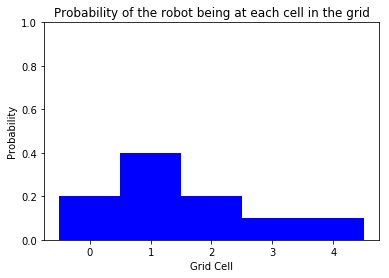

[0.11000000000000001, 0.21000000000000005, 0.3600000000000001, 0.21000000000000005, 0.11000000000000003]


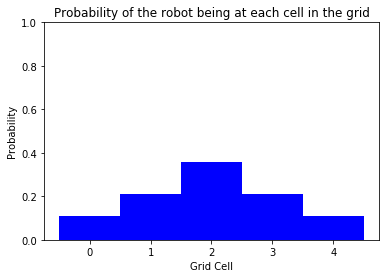

In [90]:
p=[0.2, 0.4, 0.2, 0.1, 0.1]
print(p)
display_map(p)

p = move(p,1)
print(p)
display_map(p)

[0, 1, 0, 0, 0]
Entropy -0.0


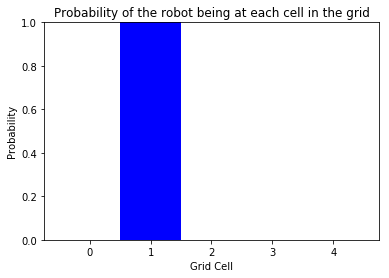

[0.0, 0.1, 0.8, 0.1, 0.0]
Entropy 0.639031859650177


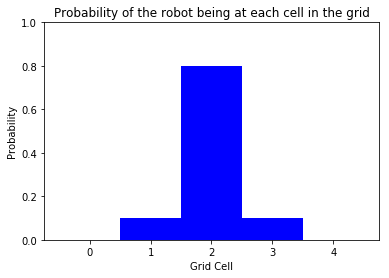

[0.010000000000000002, 0.010000000000000002, 0.16000000000000003, 0.6600000000000001, 0.16000000000000003]
Entropy 0.9527696651339206


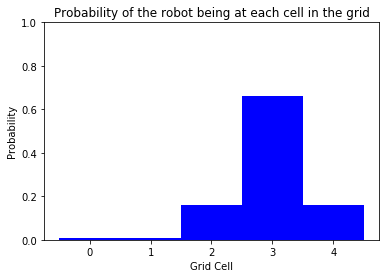

[0.19500000000000006, 0.02500000000000001, 0.02500000000000001, 0.19500000000000006, 0.5600000000000002]
Entropy 1.1466970610105167


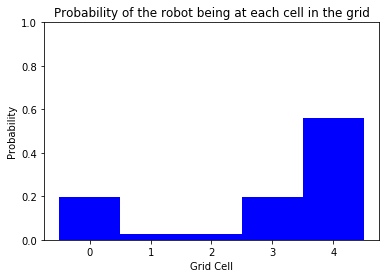

[0.4870000000000002, 0.21450000000000008, 0.042000000000000016, 0.042000000000000016, 0.21450000000000008]
Entropy 1.2771015253452103


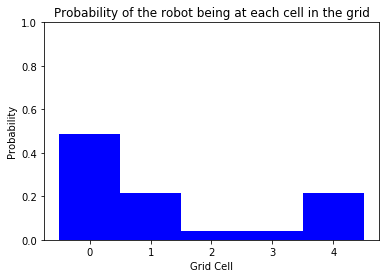

[0.22450000000000012, 0.4325000000000002, 0.22450000000000012, 0.059250000000000025, 0.059250000000000025]
Entropy 1.368141485369613


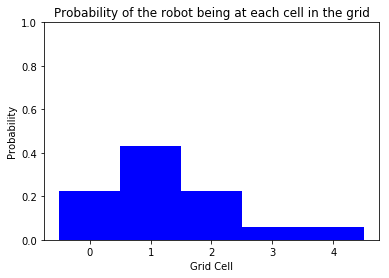

[0.07577500000000004, 0.22877500000000012, 0.39090000000000025, 0.22877500000000012, 0.07577500000000004]
Entropy 1.4330644526293508


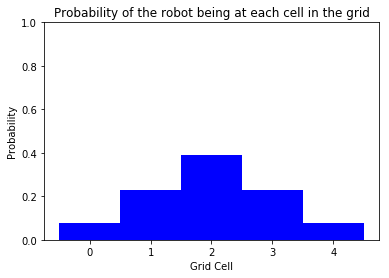

[0.09107500000000004, 0.09107500000000004, 0.22968750000000016, 0.3584750000000002, 0.22968750000000016]
Entropy 1.4799596734730383


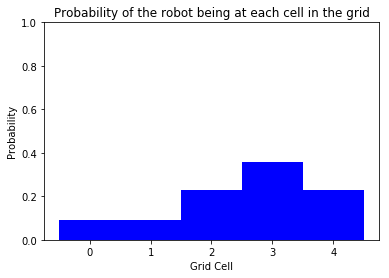

[0.22870500000000016, 0.10493625000000006, 0.10493625000000005, 0.22870500000000016, 0.3327175000000003]
Entropy 1.514107016076471


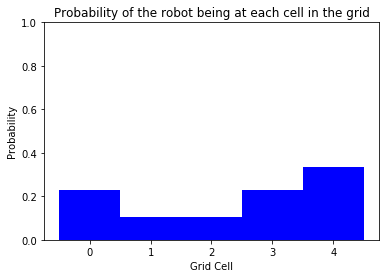

[0.3119150000000003, 0.22672937500000018, 0.11731312500000007, 0.11731312500000007, 0.22672937500000018]
Entropy 1.5391032021416282


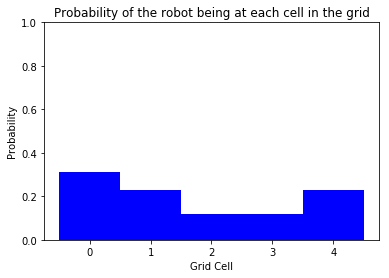

[0.2243063125000002, 0.2948778750000003, 0.2243063125000002, 0.12825475000000008, 0.12825475000000008]
Entropy 1.5574665222110196


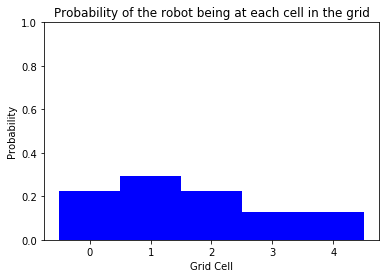

[0.1378599062500001, 0.2217583125000002, 0.28076356250000023, 0.2217583125000002, 0.1378599062500001]
Entropy 1.5709915298153965


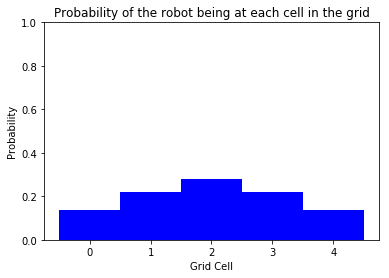

[0.14624974687500011, 0.14624974687500014, 0.2192689968750002, 0.26896251250000025, 0.2192689968750002]
Entropy 1.5809717712874263


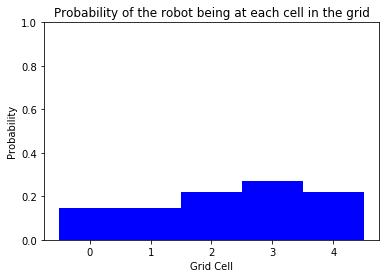

[0.21693642343750022, 0.15355167187500016, 0.15355167187500016, 0.21693642343750022, 0.25902380937500025]
Entropy 1.588346813037742


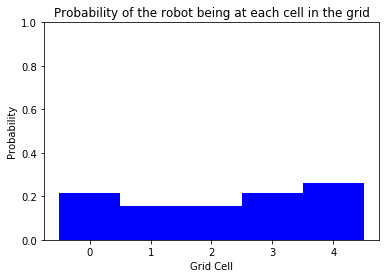

[0.2506063321875002, 0.21480668687500024, 0.15989014703125015, 0.15989014703125018, 0.21480668687500024]
Entropy 1.593802728542435


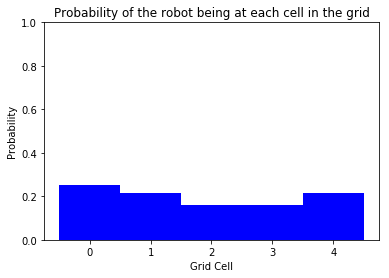

[0.21289499742187523, 0.24344640312500027, 0.21289499742187523, 0.16538180101562516, 0.16538180101562522]
Entropy 1.5978424038012087


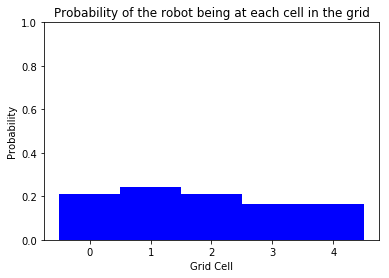

[0.17013312065625022, 0.21119881835156273, 0.23733612198437526, 0.21119881835156273, 0.1701331206562502]
Entropy 1.6008355027100198


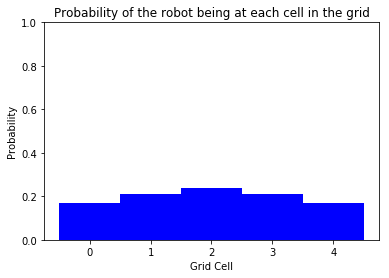

[0.17423969042578147, 0.17423969042578147, 0.20970597894531273, 0.2321086612578128, 0.20970597894531273]
Entropy 1.6030543571391356


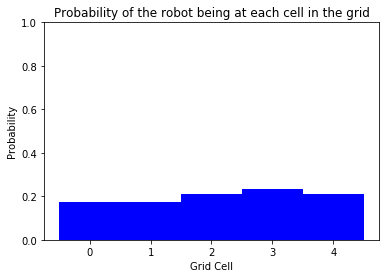

[0.20839961832460963, 0.17778631927773458, 0.17778631927773458, 0.20839961832460963, 0.2276281247953128]
Entropy 1.6046999406674152


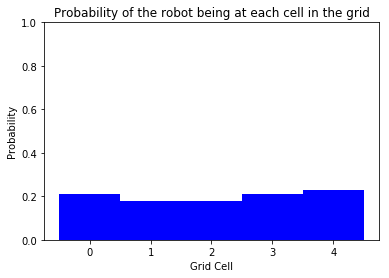

[0.22378242350117217, 0.20726113906699245, 0.18084764918242208, 0.18084764918242208, 0.20726113906699245]
Entropy 1.6059207694883222


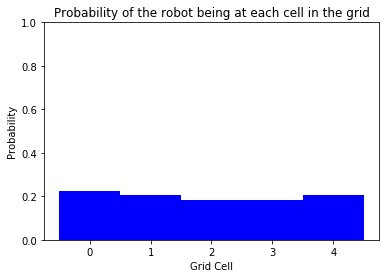

[0.2062719185219534, 0.22047816661433628, 0.20627191852195342, 0.1834889981708791, 0.18348899817087913]
Entropy 1.606826714314126


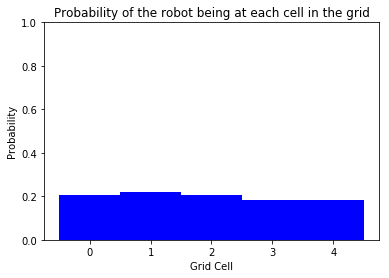

[0.18576729020598653, 0.20541425129608426, 0.2176369169958597, 0.2054142512960843, 0.18576729020598653]
Entropy 1.6074991268374026


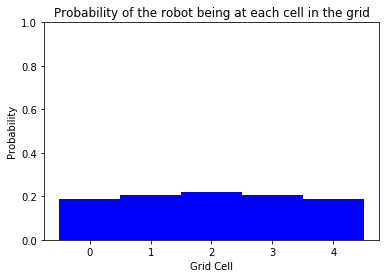

[0.18773198631499632, 0.18773198631499632, 0.20467182175705204, 0.21519238385590467, 0.20467182175705206]
Entropy 1.6079982837871192


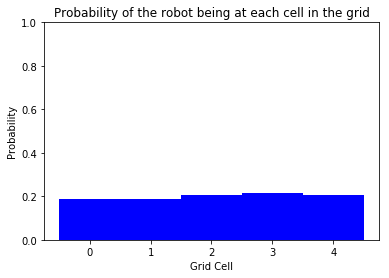

[0.20402989442273176, 0.1894259698592019, 0.1894259698592019, 0.20402989442273173, 0.21308827143613415]
Entropy 1.6083688708127224


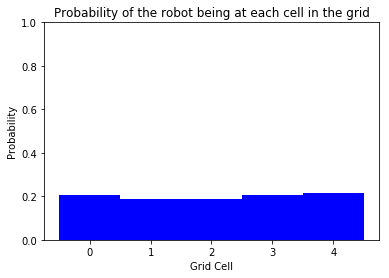

[0.21127659603345367, 0.20347533966771902, 0.1908863623155549, 0.1908863623155549, 0.203475339667719]
Entropy 1.608644029322004


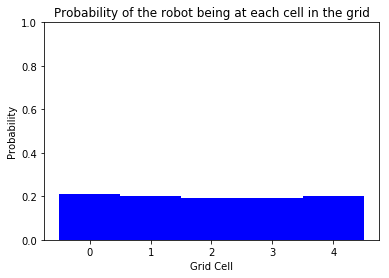

[0.20299656756907605, 0.20971634476030676, 0.20299656756907608, 0.19214526005077132, 0.19214526005077132]
Entropy 1.6088483469986863


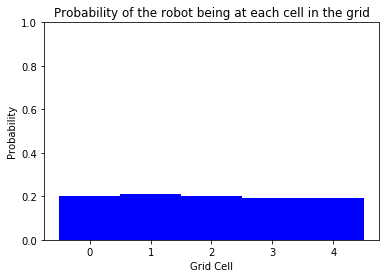

[0.19323039080260182, 0.20258341453636866, 0.20837238932206065, 0.2025834145363687, 0.19323039080260182]
Entropy 1.609000070181315


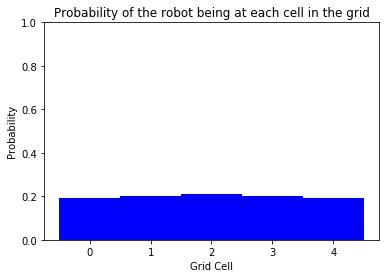

[0.1941656931759785, 0.1941656931759785, 0.20222700964156118, 0.20721459436492226, 0.2022270096415612]
Entropy 1.6091127420224103


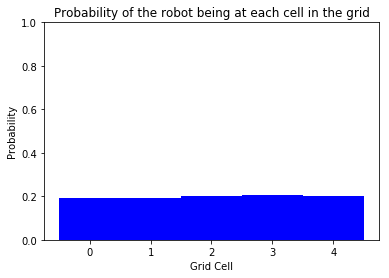

[0.20191963646733907, 0.1949718248225368, 0.1949718248225368, 0.20191963646733904, 0.20621707742025008]
Entropy 1.6091964163107237


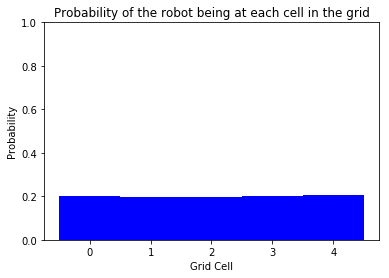

[0.20535758922966788, 0.20165459939814998, 0.19566660598701707, 0.19566660598701704, 0.20165459939814995]
Entropy 1.6092585573643157


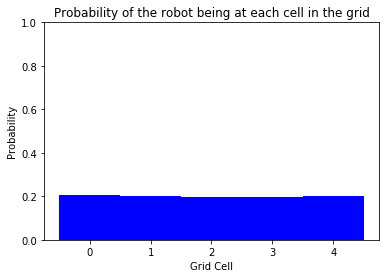

[0.2014260990401885, 0.2046169912633643, 0.2014260990401885, 0.1962654053281304, 0.19626540532813036]
Entropy 1.6093047074685733


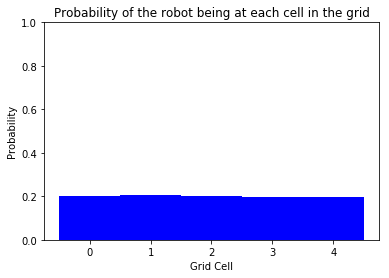

In [91]:
p=[0, 1, 0, 0, 0]
print(p)
print('Entropy', entropy(p))
display_map(p)

for i in range(30):
    p = move(p,1)
    print(p)
    print('Entropy', entropy(p))
    display_map(p)

# Sense and Move

In this notebook, let's put all of what we've learned together and see what happens to an initial probability distribution as a robot goes trough cycles of sensing then moving then sensing then moving, and so on! Recall that each time a robot senses (in this case a red or green color)it gains information about its environment, and everytime it moves, it loses some information due to motion uncertainty.


<img src='images/sense_move.png' width=50% height=50% />

In [120]:
def print_distribution(step, p):
    print(step, p, 'Entropy', entropy(p))
    display_map(p)

After sensing: [0.1111111111111111, 0.3333333333333332, 0.3333333333333332, 0.1111111111111111, 0.1111111111111111] Entropy 1.464816384890813


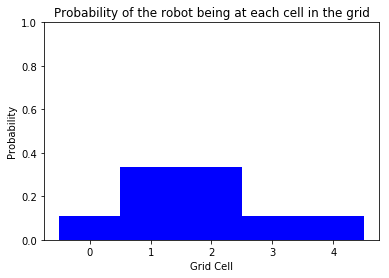

After moving: [0.11111111111111112, 0.1333333333333333, 0.311111111111111, 0.311111111111111, 0.13333333333333333] Entropy 1.5079534137228887


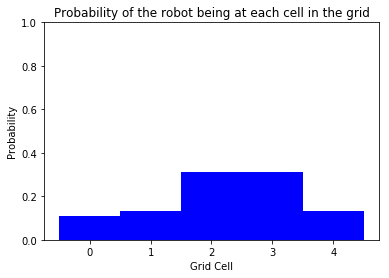

After sensing: [0.1578947368421053, 0.06315789473684211, 0.1473684210526316, 0.44210526315789467, 0.18947368421052638] Entropy 1.4241197541631985


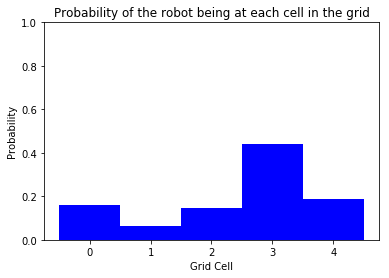

After moving: [0.21157894736842112, 0.1515789473684211, 0.08105263157894739, 0.16842105263157897, 0.3873684210526316] Entropy 1.4856275100418173


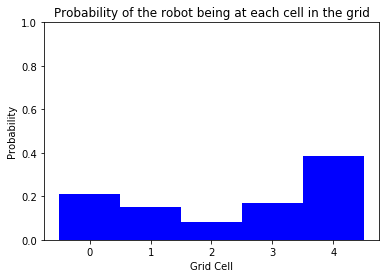

In [125]:
## Compute the posterior distribution if the robot first senses red, then moves 
## right one, then senses green, then moves right again, starting with a uniform prior distribution.
p = [0.2, 0.2, 0.2, 0.2, 0.2]
world=['green', 'red', 'red', 'green', 'green']
measurements = ['red', 'green']
motions = [1, 1]

for i in range(len(measurements)):
    p = sense(p, measurements[i])
    print_distribution('After sensing:', p)
    
    p = move(p, motions[i])
    print_distribution('After moving:', p)

After sensing: [0.1111111111111111, 0.3333333333333332, 0.3333333333333332, 0.1111111111111111, 0.1111111111111111] Entropy 1.464816384890813


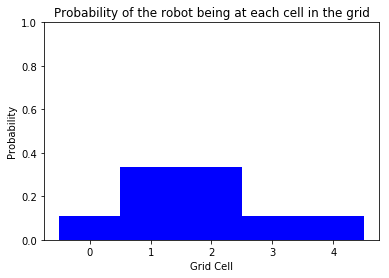

After moving: [0.11111111111111112, 0.1333333333333333, 0.311111111111111, 0.311111111111111, 0.13333333333333333] Entropy 1.5079534137228887


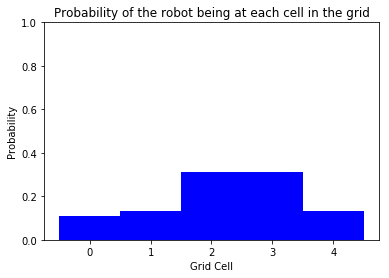

After sensing: [0.058823529411764726, 0.2117647058823529, 0.49411764705882344, 0.16470588235294117, 0.07058823529411766] Entropy 1.327905790582259


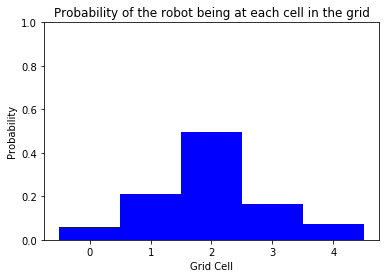

After moving: [0.07882352941176472, 0.07529411764705884, 0.22470588235294117, 0.4329411764705882, 0.18823529411764706] Entropy 1.4072722562200106


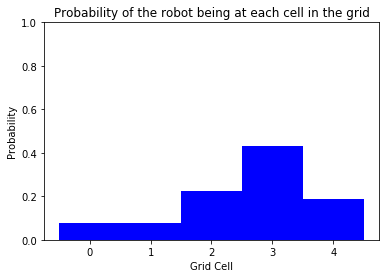

In [126]:
p = [0.2, 0.2, 0.2, 0.2, 0.2]
world=['green', 'red', 'red', 'green', 'green']
measurements = ['red', 'red']
motions = [1, 1]

for i in range(len(measurements)):
    p = sense(p, measurements[i])
    print_distribution('After sensing:', p)
    
    p = move(p, motions[i])
    print_distribution('After moving:', p)